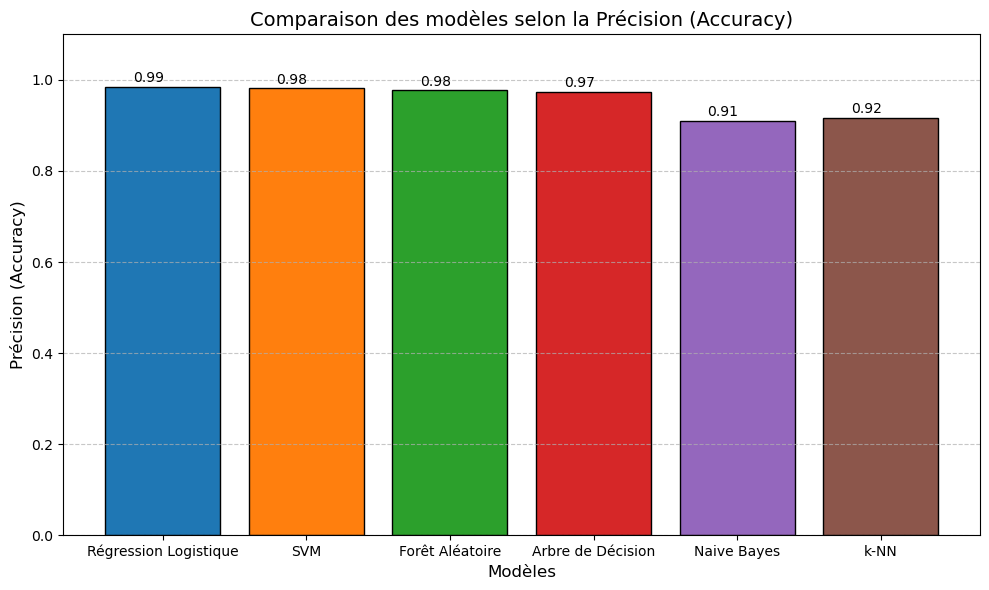

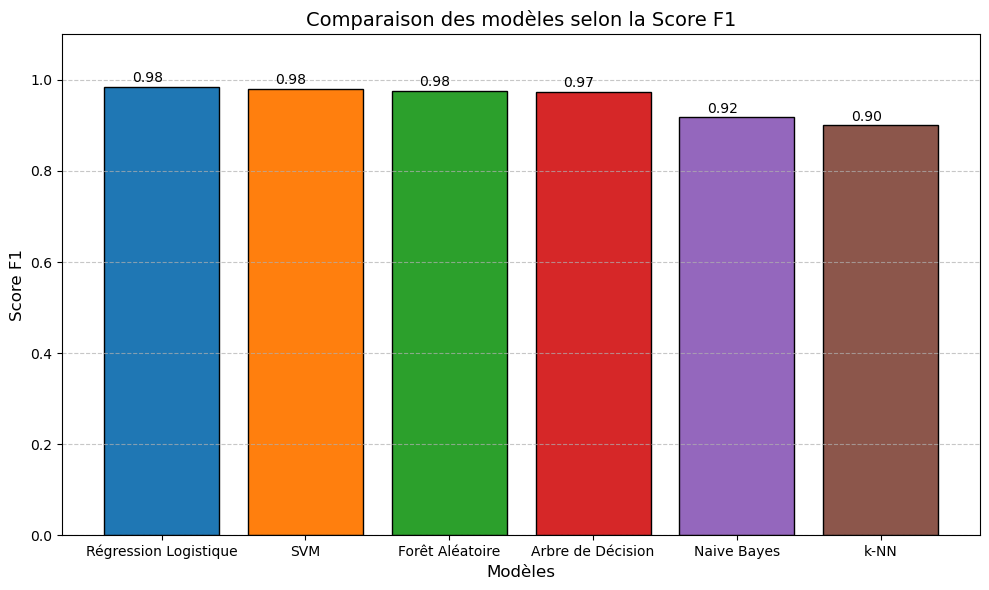

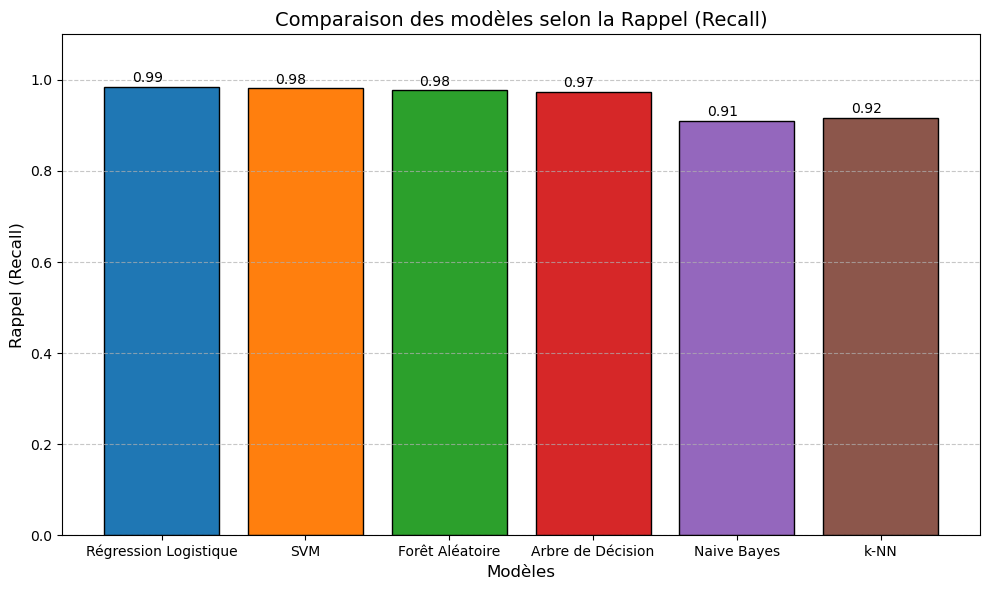

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


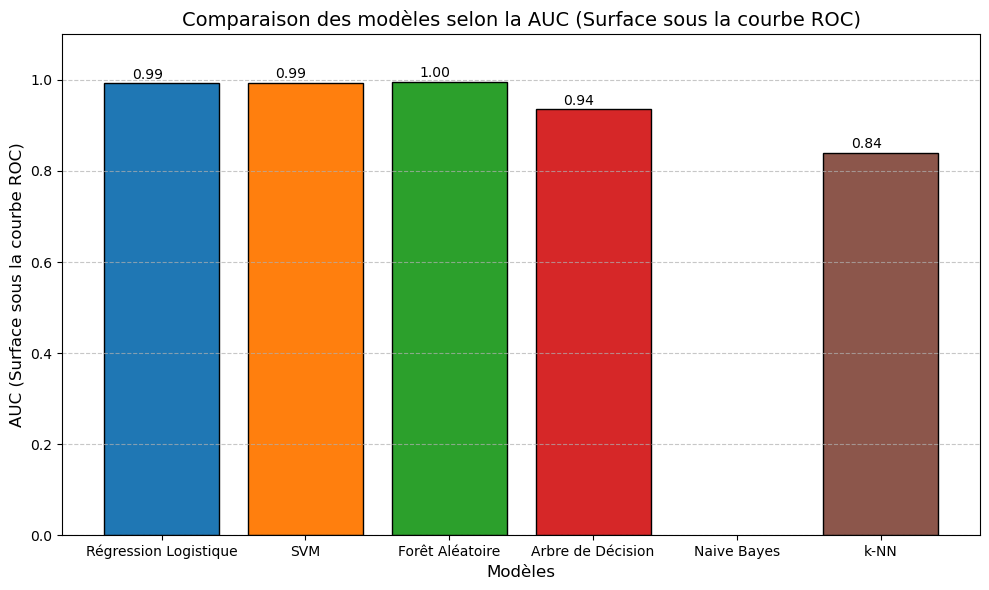

Les résultats ont été exportés dans les fichiers : C:\Users\sbond\Desktop\spam_classifier_project\Benchmarck algo class\benchmark_results.csv, C:\Users\sbond\Desktop\spam_classifier_project\Benchmarck algo class\benchmark_results.pdf et C:\Users\sbond\Desktop\spam_classifier_project\Benchmarck algo class\benchmark_results_ranked.csv


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Charger les données
data_path = r"C:\Users\sbond\Desktop\spam_classifier_project\SMSSpamCollection.csv"
data = pd.read_csv(data_path, sep='\t', header=None, names=['Label', 'Message'])
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

# Vectorisation du texte
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])
y = data['Label']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir les modèles
models = {
    "Régression Logistique": LogisticRegression(max_iter=500),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

# Initialiser un tableau de résultats
results = []

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    if name == "Naive Bayes":  # Naive Bayes ne supporte pas directement les matrices sparse
        model.fit(X_train.toarray(), y_train)
        y_pred = model.predict(X_test.toarray())
        y_prob = None  # GaussianNB ne fournit pas de méthode predict_proba compatible multi-classes ici
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append({
        "Modèle": name,
        "Précision": accuracy,
        "Score F1": f1,
        "Rappel": recall,
        "AUC": auc,
    })

# Convertir en DataFrame
results_df = pd.DataFrame(results)

# Ajouter une colonne pour la moyenne des scores
results_df["Score Moyen"] = results_df[["Précision", "Score F1", "Rappel", "AUC"]].mean(axis=1)

# Trier les modèles par score moyen décroissant
results_df = results_df.sort_values(by="Score Moyen", ascending=False)

# Exporter les résultats en CSV
csv_file_path = r"C:\Users\sbond\Desktop\spam_classifier_project\Benchmarck algo class\benchmark_results.csv"
results_df.to_csv(csv_file_path, index=False)

# Création des graphiques avec titres en français et couleurs spécifiques
metrics_titles = {
    "Précision": "Précision (Accuracy)",
    "Score F1": "Score F1",
    "Rappel": "Rappel (Recall)",
    "AUC": "AUC (Surface sous la courbe ROC)"
}

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]  # Couleurs distinctes pour chaque modèle
pdf_file_path = r"C:\Users\sbond\Desktop\spam_classifier_project\Benchmarck algo class\benchmark_results.pdf"

with PdfPages(pdf_file_path) as pdf:
    for metric, title in metrics_titles.items():
        plt.figure(figsize=(10, 6))
        bars = plt.bar(results_df["Modèle"], results_df[metric], color=colors, edgecolor='black')

        # Ajouter les valeurs numériques au-dessus des barres
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, 
                     f"{bar.get_height():.2f}", ha='center', fontsize=10)

        plt.title(f"Comparaison des modèles selon la {title}", fontsize=14)
        plt.xlabel("Modèles", fontsize=12)
        plt.ylabel(title, fontsize=12)
        plt.ylim(0, 1.1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        pdf.savefig()  # Sauvegarder dans le PDF
        plt.show()

# Ajouter un classement des modèles
results_df["Classement"] = results_df["Score Moyen"].rank(ascending=False).astype(int)

# Exporter le classement avec les résultats
ranked_csv_file_path = r"C:\Users\sbond\Desktop\spam_classifier_project\Benchmarck algo class\benchmark_results_ranked.csv"
results_df.to_csv(ranked_csv_file_path, index=False)

print(f"Les résultats ont été exportés dans les fichiers : {csv_file_path}, {pdf_file_path} et {ranked_csv_file_path}")
